# loading the dataset and import lib

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import requests


# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows
print(df.head())



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Data Preprocessing

In [76]:

# Select numerical features for clustering
X = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [77]:
X_scaled[0:10]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002]])

# Finding the Optimal Number of Clusters

In [78]:

wcss = []
k = range(1, 11)

for i in k:
    kmeans = KMeans(n_clusters=i, init='k-means++', max1_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph

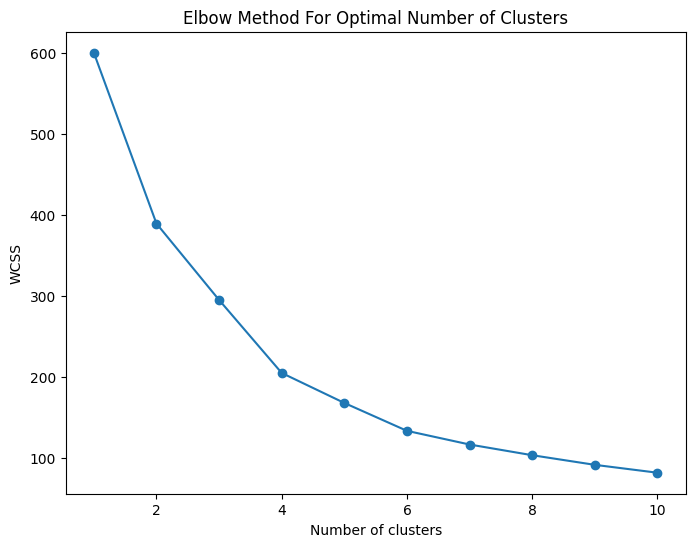

In [79]:
plt.figure(figsize=(8, 6))
plt.plot(k, wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [80]:
print(y_kmeans[0:10])

[3 4 3 4 3 4 3 4 3 4]


In [81]:
pip install kneed

# Find the elbow point using KneeLocator from the kneed package

In [82]:
from kneed import KneeLocator

kneedle = KneeLocator(k, wcss, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow
print(f'The optimal number of clusters is: {optimal_k}')

The optimal number of clusters is: 4


# Applying K-means with the optimal number of clusters (K=5)

In [83]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max1_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the original dataframe
df['Cluster'] = y_kmeans


In [84]:
print(y_kmeans[0:10])

[1 1 1 1 1 1 2 1 2 1]


# Evaluation

In [85]:

# Internal Evaluation Metrics
wcss = kmeans.inertia_
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
db_index = davies_bouldin_score(X_scaled, y_kmeans)
ch_index = calinski_harabasz_score(X_scaled, y_kmeans)

print(f'WCSS: {wcss}')
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Calinski-Harabasz Index: {ch_index}')

WCSS: 205.22514747675913
Silhouette Score: 0.4039582785148566
Davies-Bouldin Index: 0.9307956868103672
Calinski-Harabasz Index: 125.67639662405028


In [86]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [87]:
print(X_scaled[0:10], y_kmeans[0:10])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]
 [-1.20926872 -1.66266033  1.00159627]
 [-0.27630176 -1.62449091 -1.71591298]
 [-1.13750203 -1.62449091  1.70038436]
 [ 1.80493225 -1.58632148 -1.83237767]
 [-0.6351352  -1.58632148  0.84631002]] [1 1 1 1 1 1 2 1 2 1]


In [88]:
print(X_scaled[y_kmeans == 0, 0])

[-0.06100169 -0.06100169 -1.13750203  0.29783176  0.58489852 -0.99396865
 -1.3528021   0.36959845 -1.42456879  1.30256542 -0.77866858 -0.99396865
  0.65666521 -0.34806844  0.29783176  0.36959845  0.58489852 -0.13276838
 -0.34806844 -1.42456879  0.80019859  0.22606507 -0.20453507  0.08253169
 -0.20453507  0.94373197  1.37433211  1.4460988  -0.13276838  0.51313183
  0.15429838  1.08726535  0.15429838 -0.34806844 -0.41983513  0.58489852
  0.44136514 -0.49160182]


# Plot 3d Clusters Model

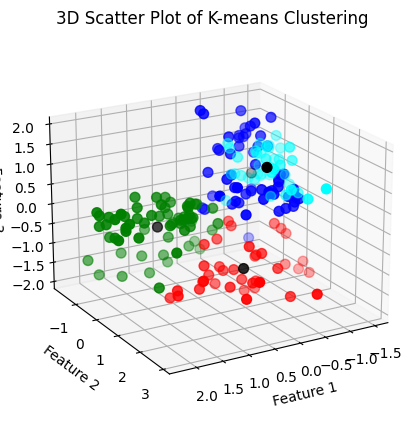

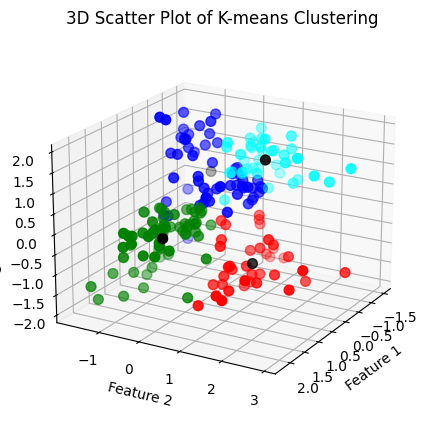

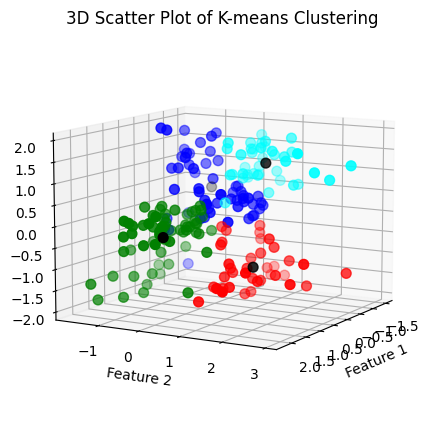

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure(figsize=(8, 5))
ax1 = fig1.add_subplot(111, projection='3d')


# Plotting each cluster in different colors
ax1.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], X_scaled[y_kmeans == 0, 2], s=50, c='red', label='Cluster 1')
ax1.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], X_scaled[y_kmeans == 1, 2], s=50, c='blue', label='Cluster 2')
ax1.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], X_scaled[y_kmeans == 2, 2], s=50, c='green', label='Cluster 3')
ax1.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], X_scaled[y_kmeans == 3, 2], s=50, c='cyan', label='Cluster 4')
ax1.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], X_scaled[y_kmeans == 4, 2], s=50, c='magenta', label='Cluster 5')
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=50, c='black', marker='o', edgecolor='black', label='Centroids')


# Adding labels and title
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.set_title('3D Scatter Plot of K-means Clustering')

# Change view angles
ax1.view_init(elev=20, azim=60)


# plot second figer
fig2 = plt.figure(figsize=(8, 5))
ax2 = fig2.add_subplot(111, projection='3d')


# Plotting each cluster in different colors
ax2.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], X_scaled[y_kmeans == 0, 2], s=50, c='red', label='Cluster 1')
ax2.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], X_scaled[y_kmeans == 1, 2], s=50, c='blue', label='Cluster 2')
ax2.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], X_scaled[y_kmeans == 2, 2], s=50, c='green', label='Cluster 3')
ax2.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], X_scaled[y_kmeans == 3, 2], s=50, c='cyan', label='Cluster 4')
ax2.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], X_scaled[y_kmeans == 4, 2], s=50, c='magenta', label='Cluster 5')
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=50, c='black', marker='o', edgecolor='black', label='Centroids')


# Adding labels and title
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 3')
ax2.set_title('3D Scatter Plot of K-means Clustering')

# Change view angles
ax2.view_init(elev=20, azim=30)



# plot third figer
fig3 = plt.figure(figsize=(8, 5))
ax3 = fig3.add_subplot(111, projection='3d')


# Plotting each cluster in different colors
ax3.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], X_scaled[y_kmeans == 0, 2], s=50, c='red', label='Cluster 1')
ax3.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], X_scaled[y_kmeans == 1, 2], s=50, c='blue', label='Cluster 2')
ax3.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], X_scaled[y_kmeans == 2, 2], s=50, c='green', label='Cluster 3')
ax3.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], X_scaled[y_kmeans == 3, 2], s=50, c='cyan', label='Cluster 4')
ax3.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], X_scaled[y_kmeans == 4, 2], s=50, c='magenta', label='Cluster 5')
ax3.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=50, c='black', marker='o', edgecolor='black', label='Centroids')


# Adding labels and title
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.set_zlabel('Feature 3')
ax3.set_title('3D Scatter Plot of K-means Clustering')

# Change view angles
ax3.view_init(elev=10, azim=30)

# Display the plot
plt.show()